# Kaggle challenge: Houses prices prediction

# 1) Importing libraries

In [2]:
#for working with data in python
import numpy as np
import pandas as pd

#to plotting and view data
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# 2) Reading the data

In [3]:
#read csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# see data
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [5]:
# to see some rows
train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [6]:
# to see  rows
test.head().T

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# 3) Exploring the data

In [7]:
#In this challenge, we try to predict the houses sales price. So, our dependent variable is y hat = sale.price. 
#To begin to understanding our data, let's check out some statistics from him. 
#To do this, let's apply the Describe function. This function return some statistics values as mean and std.

print (train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


1.8828757597682129


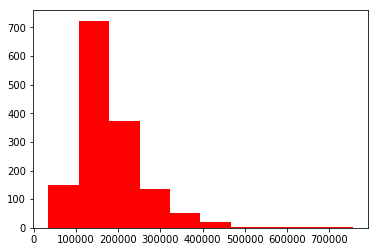

In [8]:
# A distribution of  values in a data set can be symmetrical or asymmetrical. 
# In any statistical analyses, characterize the location and variability of a data set is a fundamental task. 
# So, let's check the Skewness. Skewness is asymmetry in a statistical distribution. 
# It can be quantified to what extent a distribution differs from a normal distribution, where the curve appears distorted (or skewed) either to the left or to the right.

print (train.SalePrice.skew())
plt.hist (train.SalePrice, color = 'red')
plt.show() 


 Sekew is: 0.12133506220520406


<function matplotlib.pyplot.show(*args, **kw)>

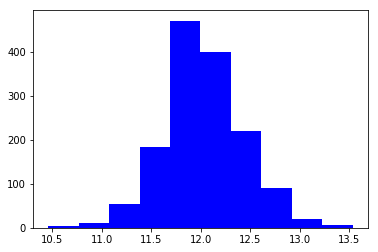

In [9]:
# Our distribution is possibly skewed, because there is a tendency in aglomeration of data in left and a long tail in the right side.
# When the asymmetry is on left, we said positive and when it is on right, we said negative. 
# In a case of posite asymmetry we perform log, when it is negative we perform an exponential.

target = np.log (train.SalePrice)
print ("\n Sekew is:", target.skew())
plt.hist(target, color = 'blue')
plt.show


In [ ]:
# A value closer than 0 means that we improve our data set values (Skew is: 0.12133506220520406).

# 4) Clean Data and Feature Engineering 

In [10]:
#Constructing new features from existing data to train a machine learning model it's what a feature learning does.
# First, let's check out in data and looking for correlations between features and the target

numeric_features = train.select_dtypes(include = [np.number])
corr = numeric_features.corr()

# The first five values are the ones most probably correlates with the prices, 
# while the last five ones are the the less probably related

print (corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


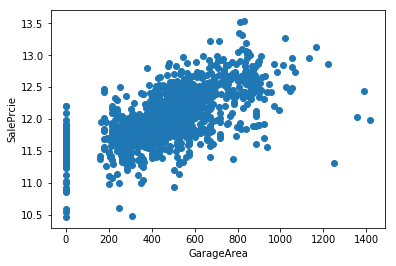

In [11]:
# In order to vizualize the relashionship between  the variables 'GarageArea' and 'SalePrice', let's do a scatter plot.
plt.scatter (x =train['GarageArea'], y=target)
plt.ylabel('SalePrcie')
plt.xlabel('GarageArea')
plt.show()

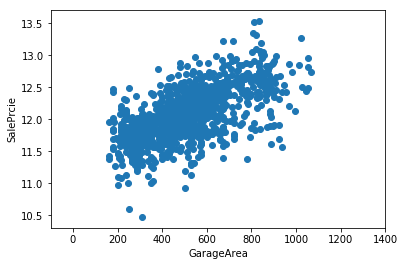

In [23]:
# There are many houses without garage and also some houses that have a garage area biggest that the mean. They are outliers. 
# The outliers can affect the analysis because they can cause bias, so is better to remove them.

train = train[train['GarageArea'] > 0]
train = train[train['GarageArea']< 1100]

#Plot the scatter plot whitout outliers

plt.scatter (x =train['GarageArea'], y= np.log(train.SalePrice))
plt.xlim(-100, 1400) # to maintain the same scale
plt.ylabel('SalePrcie')
plt.xlabel('GarageArea')
plt.show()


In [12]:
# Now, we will check the null values.

nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print (nulls) 

              Null Count
Feature                 
PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [13]:
# Now, we will check the categorcial features (non numerical).

categoricals = train.select_dtypes(exclude = [np.number])
print (categoricals.describe().T)


              count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       T

In [19]:
# The algorithm that peform the linear regretion just works with numerical values.
# To do this, we will use the one-hot encoding technique, that is a process 
# that is a process by which categorical variables are converted into a form 
# that could be provided to ML algorithms to do a better job in prediction.

print ('Original: \n')
print (train.Street.value_counts(), '\n')

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [24]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first = True)
test ['enc_street'] = pd.get_dummies(train.Street, drop_first = True)
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


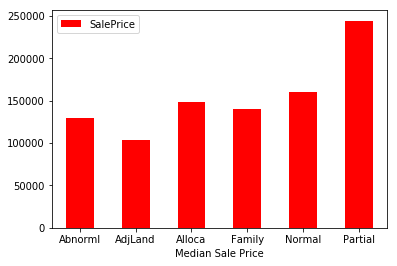

In [14]:
condition_pivot = train.pivot_table(index = 'SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Sale Condition')
plt.xlabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

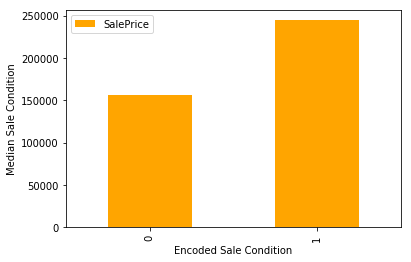

In [15]:
# Because the Partial feature have median higher than the others, 
# it will be encoded as a new feature and all the others that have median inferior than that will be encoded together.

def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = train.SaleCondition.apply(encode)

# to plot

condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot (kind='bar', color='orange')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Condition')
plt.show()




In [16]:
# checking Nan
import math
x=float('nan')
math.isnan(x)

True

In [18]:
# Replace NaNs with average values by interpolation method

data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print (sum(data.isnull().sum() !=0))


0


In [23]:
y=np.log(train.SalePrice)
x=data.drop(['SalePrice', 'Id'], axis=1)
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, test_size=.33)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
print('R^2 is:\n', model.score(x_test, y_test))


R^2 is:
 0.863477516598835


In [24]:
predictions=model.predict(x_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.023267715699641887


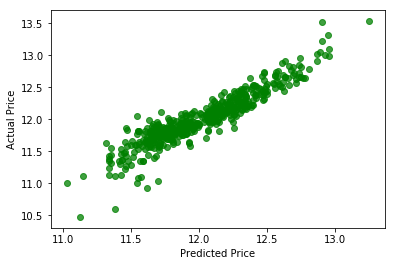

In [28]:
actual_values=y_test
plt.scatter(predictions, actual_values, alpha=.75, color='green')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

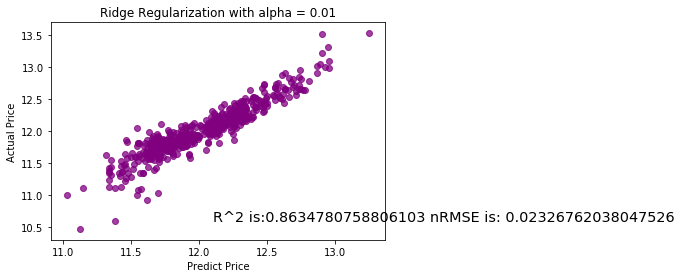

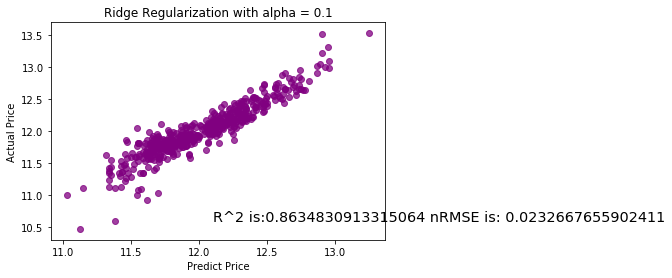

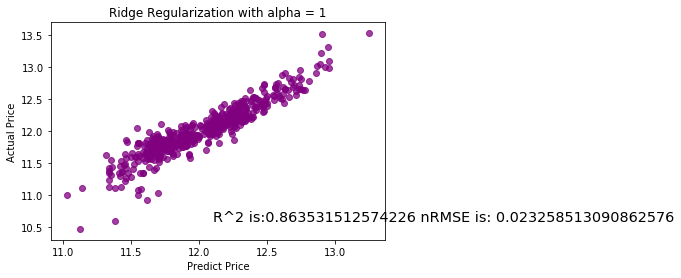

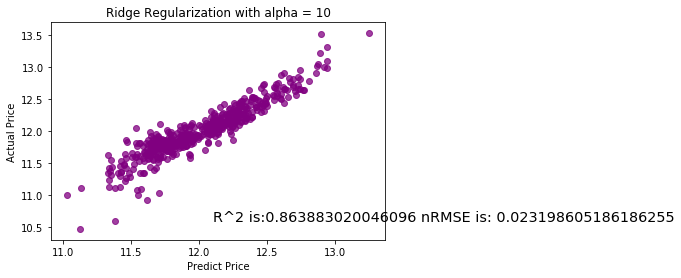

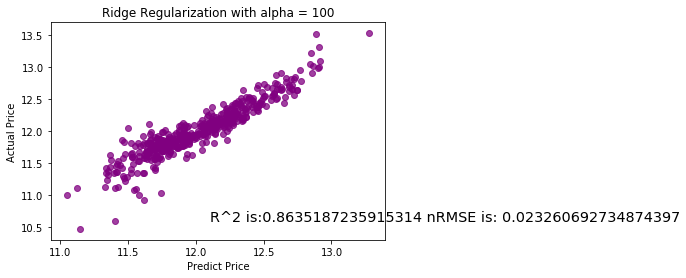

In [31]:
for i in range(-2,3):
    alpha=10**i
    rm=linear_model.Ridge(alpha=alpha)
    ridge_model=rm.fit(x_train, y_train)
    preds_ridge=ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='purple')
    plt.xlabel('Predict Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'. format(alpha))
    overplay= 'R^2 is:{} nRMSE is: {}'.format(ridge_model.score(x_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overplay, xy=(12.1,10.6), size='x-large')
    plt.show()

In [35]:
submission=pd.DataFrame()
submission['Id']= test.Id
feats=test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions=model.predict(feats)
final_predictions=np.exp(predictions)
print('Original Predictions are: \n', predictions[:10],'\n')
print('Final Predictions are: \n', predictions[10:])




Original Predictions are: 
 [11.6863274  11.71461294 12.03148432 12.18149509 12.10570333 12.07743046
 12.19530474 12.05253278 12.19431087 11.6878118 ] 

Final Predictions are: 
 [12.18775071 11.67045596 11.52080969 ... 12.05551267 11.59399354
 12.38730102]


In [41]:
submission['SalePrice']= final_predictions
print(submission.head())
submission.to_csv('submission_lima.csv', index=False)

     Id      SalePrice
0  1461  118934.404691
1  1462  122346.558140
2  1463  167960.535769
3  1464  195144.403295
4  1465  180900.661720
